### Eq. 5
#### From Stolper et al., 2018, the effects of Δ47 by carbonate diagenesis can be described by the following equation:
$$
\frac{d\Delta 47(t,d)}{dt} = -R(t)\times\Delta 47_{init}(t,d) + R(t)\times\Delta 47_{recry}(t,d) \\
\begin{aligned}
&\Delta 47(t,d) \text{: Δ47}\\  
&R(t) \text{: Reacting Rate}\\
&\Delta 47_{init}(t,d) \text{: Initial Δ47}\\
&\Delta 47_{recry}(t,d) \text{: Diagenesised Δ47}
\end{aligned}
$$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the carbonate diagenesised Δ47 first-order differentiation kinetic model
def Carbonate_diagenesis_d47_model(d47, t, R, d47_init, d47_recry):
    d47_dt = -R * d47_init + R * d47_recry
    return d47_dt

# Experimental parameters
R = 0.01 # reaction rate
d47_init = 10.0  # Initial Δ47 
d47_recry = 5.0 # Diagenesised Δ47

In [4]:
# Set the time steps
t = np.linspace(0, 10, 100)  

# Calculate the carbonate diagenesised Δ47 first-order differentiation kinetic model
d47 = odeint(Carbonate_diagenesis_d47_model, d47_init, t, args=(R, d47_init, d47_recry))

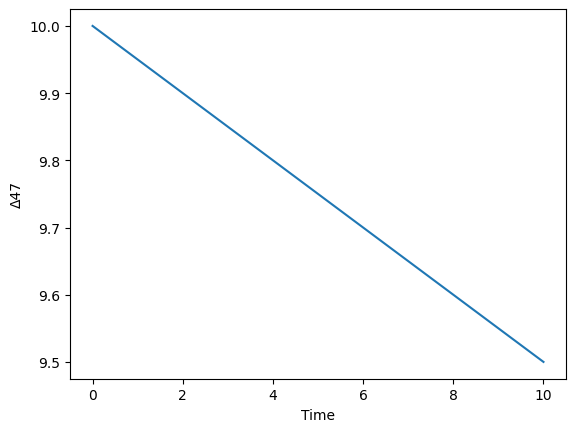

In [5]:
plt.plot(t, d47)
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

### Eq. 6
#### Unfortuinately, the above equation cannot be used to describe the effects of Δ47 by carbonate diagenesis. Reseaons are as follows:
1. The carbonate always keeps mass balance during the diagenesis.
2. The unreacted carbonate is linear mixed with re-crystaled carbonate during the diagenesis.
3. The un- and re-crystaled carbonate have tiny differences in their carbon and oxygen istopes (Defliese and Lohmann, 2015)
4. The reacting rate (Rt) is not constant during the diagenesis.

#### Therefore, the following equation is used to describe the effects of Δ47 by carbonate diagenesis:
$$
\begin{aligned}
\Delta 47(M_l) &= M_l \times [1 - R(M_l)] \times \Delta 47_{init}(M_0) \\
&+ M_l \times R(M_l) \times \Delta 47_{recry}(M_l) \\
&\Delta 47(M_l) \text{: The Δ47 in the first depositing-diaganesis period}\\
&M_l \text{: Carbonate mass in the first depositing-diaganesis period}\\  
&R(M_l) \text{: Reacting rate in the first depositing-diaganesis period}\\
&\Delta 47_{init}(M_0) \text{: Initial Δ47}\\
&\Delta 47_{recry}(M_l) \text{: Diaganesised Δ47 in the first depositing-diaganesis period}
\end{aligned}
$$

In [6]:
import numpy as np
from scipy.integrate import odeint

# Define the carbonate diagenesised Δ47 first-order differentiation kinetic model in dt
def dt_Carbonate_diagenesis_d47_model(d47, ml, R, d47_init, d47_recry):
    d47_dt = ml * (1 - R) * d47_init + ml * R * d47_recry
    return d47_dt

# Experimental parameters
ml = 0.8 # Carbonate mass
R = 0.01 # Reacting rate
d47_init = 10 # Initial Δ47
d47_recry = 5 # Diagenesised Δ47  

In [7]:
# Set the time steps
t = np.linspace(0, 10, 100)  

# Calculate the carbonate diagenesised Δ47 first-order differentiation kinetic model
d47 = odeint(dt_Carbonate_diagenesis_d47_model, d47_init, t, args=(ml, R, d47_recry))

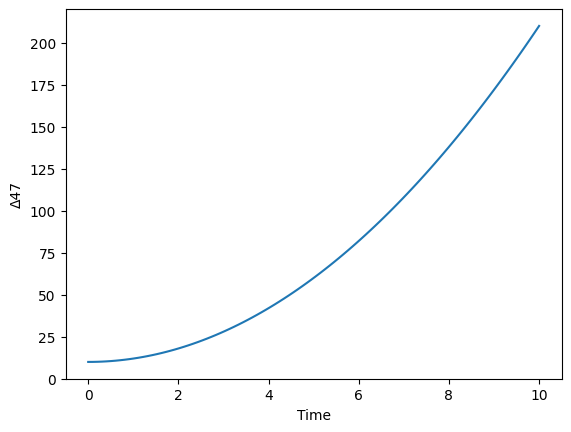

In [8]:
import matplotlib.pyplot as plt 
plt.plot(t, d47)
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

#### Here, we make an experiment that the carbonate has five diaganesis periods.

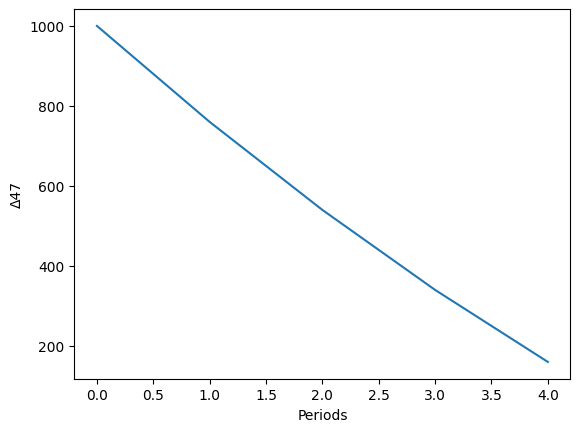

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter initialization
M0 = 100  
d47_init = 10
d47_recry = 5
periods = 5

# Reacting function 
def R(Ml):
    return 0.5 * (1 - Ml/M0)  

# Periodic Δ47
results = np.zeros(periods)
for i in range(periods):
    Ml = M0 * (1 - 0.2*i) 
    Rl = R(Ml)
    results[i] = Ml * (1 - Rl) * d47_init + Ml * Rl * d47_recry

plt.plot(results)
plt.xlabel('Periods')
plt.ylabel('Δ47')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25180\3968852907.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d47[i] = d47_tmp[-1]


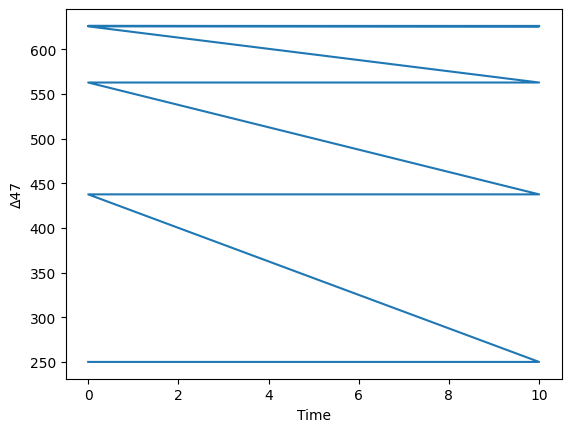

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set five diaganesis periods
periods = 5  
t_max = 10 # Max diaganesis time

# Parameter initialization
d47 = np.zeros(periods) 
d47[0] = 10 # Initial Δ47

ml = np.linspace(1, 0, periods) # Carbonate mass
R = 0.01 * np.ones(periods) # Reacting rate
d47_recry = np.ones(periods) * 5 # Diaganesised Δ47

# Time sequence
t = np.linspace(0, t_max, 100) 
t = np.repeat(t[np.newaxis, :], periods, axis=0)  # 将t变为二维数组

# Loop calculation
results = np.zeros((periods, 100)) 
for i in range(periods):
    d47_i =  d47[i-1]
    ml_i = ml[i]  
    R_i = R[i]
    d47_recry_i = d47_recry[i]
    t_i = t[i, :]
    d47_tmp = odeint(dt_Carbonate_diagenesis_d47_model, d47_i, t_i, args=(ml_i, R_i, d47_recry_i))
    d47[i] = d47_tmp[-1]
    results[i] = d47[i]

plt.plot(t.ravel(), results.ravel())
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

### Eq. 7
#### Except for the rating differences of DIC vs. Recrystalization, the re-ordering process caused by the carbonate burial would also affect Δ47. Usually, the re-ordering follows the first-order differentiation kinetic model. The relationship of Δ47 and t can be described as:
$$
\begin{aligned}
\ln\left[\frac{\Delta 47_t - \Delta 47_\text{eq}}{\Delta 47_\text{init} - \Delta 47_\text{eq}}\right] &= -kt\\
&\Delta 47_t: \text{experience time } t \text{ after reordering the} \Delta 47 \text{value}\\
&\Delta 47_\text{eq} \text{and} \Delta 47_\text{init}: \text{are balanced and initial} \Delta 47 \text{values}\\
&k: \text{reacting rate,relating to the thermal parameters}: \\  
&k(T) = A\cdot \exp\left[\frac{-E_a}{RT}\right]\\
&T: \text{the environmental thermal parameters(K)}\\
&A: \text{pre-exponential factor}\\
&E_a: \text{apparent activation energy}\\
&R: \text{molar gas constant}
\end{aligned}
$$
#### For K, it can be further calculated by:
$$
k(T) = A\cdot \exp\left[\frac{-E_a}{RT}\right]
$$

In [5]:
import math
from scipy.optimize import newton

# Like Guo et al., 2022 "碳酸盐成岩作用中的团簇同位素地球化学研究进展", "矿物岩石地球化学通报", if we can know the strata temprature varations
old_time = list(range(0, 110, 10))
simulated_temprature = [1, 100, 200, 300, 400, 500, 400, 300, 200, 100, 1]
delta47_init = 0.58

# 定义方程
def equation(delta47_t, T, t):
    """
    @Note: In Passey and Henkes, 2012, EPSL, the thermal dynamic units are ℃
    """
    delta47_eq = (-3.407 * (1e9)) / (T ** 4) + (2.365 * (1e7)) / (T ** 3) - (2.607 * (1e3)) / (T ** 2) - 5.880 / T + 0.280
    ln_expr = math.log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
    ln_k = -22.9 * 1000 / T + 22.3
    return - math.exp(ln_k) * (t * 100 *10000 * 365 * 24 * 60 / 1000) - ln_expr

# 循环模拟
delta47_t_list = []
max_iter = 1000  # 设置最大迭代次数
for i in range(len(simulated_temprature)):
    # 使用牛顿法求解方程的根
    delta47_t = newton(equation, delta47_init, args=(simulated_temprature[i], 25), maxiter=max_iter)
    delta47_t_list.append(delta47_t)
    delta47_init = delta47_t

print(delta47_t_list)

[0.58, 0.58, 0.58, 0.5800000000000048, 0.5799991765155954, 0.4752580963065776, 0.4752581850835628, 0.47525818508357226, 0.47525818508357226, 0.47525818508357226, 0.47525818508357226]


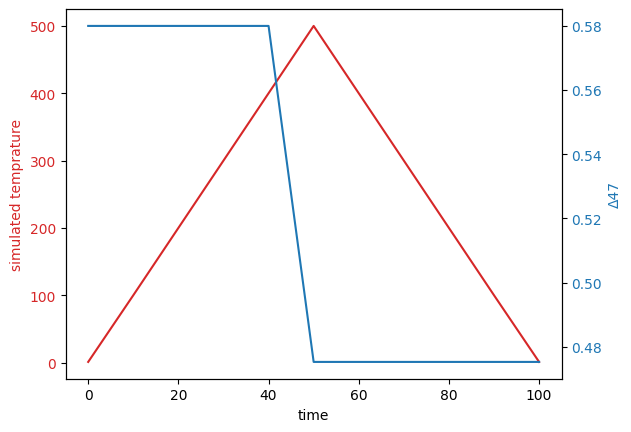

In [6]:
import matplotlib.pyplot as plt

# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(old_time, simulated_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(old_time, delta47_t_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [14]:
import math
from scipy.optimize import newton

# Like Liu et al., 2023 "碳酸盐岩团簇同位素约束下的川东地区二叠系热演化", "地质学报", if we can know the strata temprature varations
old_time = list(range(0, 275, 5))
# 1->11
simulated_temprature = [
    10, 26, 31, 46, 61, 76, 91, 106, 121, 136, 151,
    166, 181, 196, 211, 226, 241, 256, 271, 286, 276, 266,
    256, 246, 236, 226, 216, 206, 196, 186, 176, 166, 156,
    146, 136, 126, 116, 106, 91, 76, 84, 92, 100, 108, 104,
    102, 106, 112, 92, 72, 52, 47, 40, 33, 20
]
delta47_init = 0.98

# 定义方程
def equation(delta47_t, T, t):
    """
    @Note: In Passey and Henkes, 2012, EPSL, the thermal dynamic units are ℃
    """
    delta47_eq = -(3.407 * (1e9)) / ((T+273.0) ** 4) + (2.365 * (1e7)) / ((T+273.0) ** 3) - (2.607 * (1e3)) / ((T+273.0) ** 2) - 5.880 / (T+273.0) + 0.280
    print(delta47_eq)
    ln_expr = math.log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
    ln_k = -22.9 * 1000 / T + 22.3
    return - math.exp(ln_k) * (t * 100 *10000 * 365 * 24 * 60 * 60 / 1000) - ln_expr

# 循环模拟
delta47_t_list = []
max_iter = 1000  # 设置最大迭代次数
for i in range(len(simulated_temprature)):
    # 使用牛顿法求解方程的根
    delta47_t = newton(equation, delta47_init, args=(simulated_temprature[i], 5), maxiter=max_iter)
    delta47_t_list.append(delta47_t)
    delta47_init = delta47_t

print(delta47_t_list)

0.7389605381173107
0.7389605381173107
0.7389605381173107
0.6896450437588562
0.6896450437588562
0.6896450437588562
0.6753387072234138
0.6753387072234138
0.6753387072234138
0.6354878691663303
0.6354878691663303
0.6354878691663303
0.5999894963632775
0.5999894963632775
0.5999894963632775
0.5684546698964061
0.5684546698964061
0.5684546698964061
0.5404699285574512
0.5404699285574512
0.5404699285574512
0.515633842457277
0.515633842457277
0.515633842457277
0.4935743769168063
0.4935743769168063
0.4935743769168063
0.47395575932102174
0.47395575932102174
0.47395575932102174
0.4564797314004052
0.4564797314004052
0.4564797314004052
0.44088392955040523
0.44088392955040523
0.44088392955040523
0.42693892735539696
0.42693892735539696
0.42693892735539696
0.41444478702758003
0.41444478702758003
0.41444478702758003
0.4032275741003705
0.4032275741003705
0.4032275741003705
0.39313606614419006
0.39313606614419006
0.39313606614419006
0.3840387599480243
0.3840387599480243
0.3840387599480243
0.3758212115293179


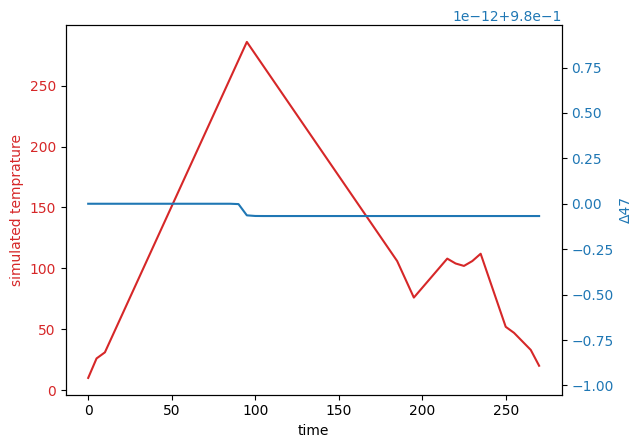

In [8]:
import matplotlib.pyplot as plt

# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(old_time, simulated_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(old_time, delta47_t_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
import numpy as np
from scipy.optimize import newton
import random
import matplotlib.pyplot as plt

# Like Liu et al., 2023 "碳酸盐岩团簇同位素约束下的川东地区二叠系热演化", "地质学报", if we can know the strata temprature varations
old_time = list(range(0, 275, 5))
# 1->11
simulated_temprature = [
    10, 26, 31, 46, 61, 76, 91, 106, 121, 136, 151,
    166, 181, 196, 211, 226, 241, 256, 271, 286, 276, 266,
    256, 246, 236, 226, 216, 206, 196, 186, 176, 166, 156,
    146, 136, 126, 116, 106, 91, 76, 84, 92, 100, 108, 104,
    102, 106, 112, 92, 72, 52, 47, 42, 37, 32, 27, 25, 20
]

# 定义方程
def equation(delta47_t, T, t, delta47_init):
    delta47_eq = (-3.407 * (1e9)) / (T ** 4) + (2.365 * (1e7)) / (T ** 3) - (2.607 * (1e3)) / (T ** 2) - 5.880 / T + 0.280
    ln_expr = np.log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
    ln_k = -22.9 * 1000 / T + 22.3
    return -np.exp(ln_k) * (t * 100 * 10000 * 365 * 24 * 60 * 60) - ln_expr

# 蒙特卡洛模拟
num_simulations = 100000  # 模拟次数
delta47_init_range = (0.7, 1.0)  # 初始值范围

delta47_t_results = []  # 存储模拟结果

maxiter=10000

for _ in range(num_simulations):
    delta47_init = random.uniform(*delta47_init_range)  # 在初始值范围内随机选择初始值

    delta47_t_list = []
    for i in range(len(simulated_temprature)):
        delta47_t = newton(equation, delta47_init, args=(simulated_temprature[i], 25, delta47_init), maxiter=max_iter)
        delta47_t_list.append(delta47_t)
        delta47_init = delta47_t

    delta47_t_results.append(delta47_t_list)

# 可视化模拟结果
plt.figure(figsize=(10, 6))
for result in delta47_t_results:
    plt.plot(old_time, result, marker='o', linestyle='-', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Delta47_t')
plt.title('Monte Carlo Simulation Results')
plt.grid(True)
plt.show()

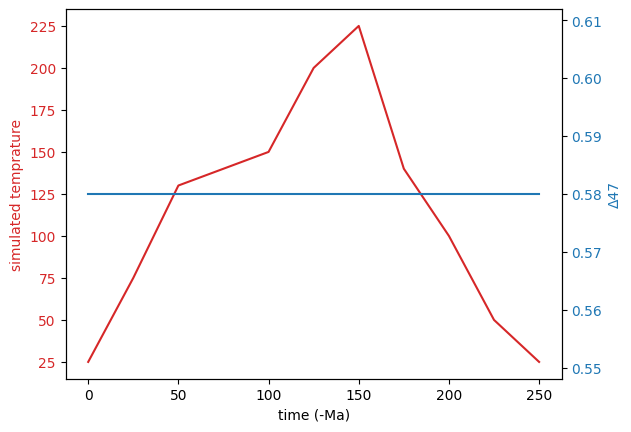

In [17]:
import matplotlib.pyplot as plt

# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (-Ma)')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(old_time, simulated_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(old_time, delta47_t_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
import numpy as np
from scipy.integrate import odeint

# Like Liu et al., 2023 "碳酸盐岩团簇同位素约束下的川东地区二叠系热演化", "地质学报", if we can know the strata temprature varations
old_time = list(range(0, 275, 25))
simulated_temprature = [25, 75, 130, 140, 150, 200, 225, 140, 100, 50, 25]

# 参数
T = simulated_temprature # 温度
t = old_time # 时间区间
Δ47eq = 0.6 # 平衡Δ47值

# 初始化Δ47数组
Δ47 = [0.58]  

# 定义微分方程
def reorder(Δ47_ode, t, T, Δ47eq):

  Δ47 = Δ47_ode[0]

  # 使用T[i]取温度值
  exp_term = -23000/(T[i]*(1e+6)*365*24*60*60+1) + 20 
  
  exp_value = np.exp(exp_term)

  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)

  # 添加判断
  if Δ47> 0.6:
    Δ47_new *= 0.25

  Δ47_ode[0] = Δ47_new

  return Δ47_ode

# 求解Δ47t
Δ47t = odeint(reorder, Δ47, t, args=(T, Δ47eq), rtol=1e-5, atol=1e-8)[:, -1]/100
# 第一个值特殊处理
Δ47t[0] = Δ47t[0] * (100 if t[0] == 0 else 1)


# 输出Δ47t
print(Δ47t)

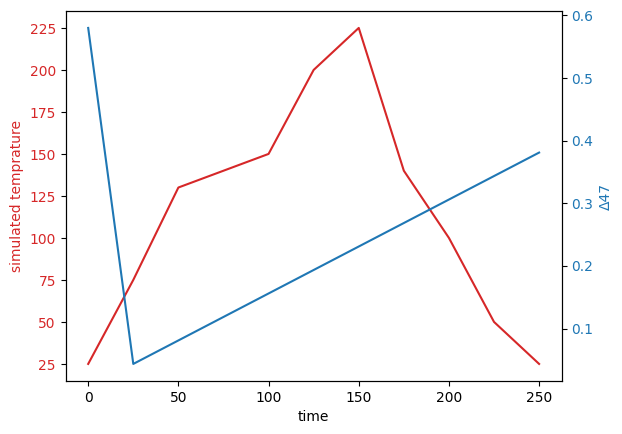

In [178]:
# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(old_time, simulated_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(old_time, Δ47t, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [48]:
import math
from sympy import symbols, Function, Eq, exp, log, dsolve

T = symbols('T')
t = symbols('t')
delta47_t = Function('delta47_t')(t)
delta47_init = symbols('delta47_init')

delta47_eq = (-3.407 * (1e9)) / (T ** 4) + (2.365 * (1e7)) / (T ** 3) - (2.607 * (1e3)) / (T ** 2) - 5.880 / T + 0.280
ln_expr = log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
ln_k = 1 - (-22.9 * 1000 / (T + 273) + 22.3)

d_delta47_t_dt = delta47_t.diff(t)
d_eq = Eq(d_delta47_t_dt, exp(ln_k) * (t * 100 * 10000 * 365 * 24 * 60 * 60) - ln_expr)

# 求解微分方程
solution = dsolve(d_eq, delta47_t)

#### From Zhu et al., 2017; Li et al., 2021; Feng et al., 2022, the stratigraphic thermal parameters (275,0,5; Ma.) can be simulated as: 

In [1]:
stra_temprature = [
    20.07814, 27.13262, 37.1717,42.14601, 48.20563, 55.16967, 62.22415, 68.19333, 77.23754, 85.28688, 96.23037, 108.25917, 117.30338, 123.363,
    131.3219, 125.35272, 121.28283, 117.30338, 121.28283, 121.28283, 123.363, 126.34759, 129.33218, 129.33218, 132.31676, 135.30135, 136.38666,
    138.37638, 140.36611, 143.3507, 143.3507, 146.33529, 150.40518, 154.38463, 158.36408, 163.42884, 166.41343, 170.39288, 172.38261, 175.45764,
    180.43195, 185.40627, 187.48643, 190.47102, 194.45047, 201.50496, 203.49468, 208.469, 208.469, 211.45359, 215.52348, 219.50293, 222.48752,
    223.48238, 225.56255, 218.50807, 210.45872, 206.47927, 202.49982, 198.42993, 192.46075, 187.48643, 179.43709, 172.38261, 163.42884, 154.38463,
    149.41032, 141.36097, 133.31163, 124.35786,	117.30338, 106.26945, 100.30027, 87.27661, 80.22213, 71.17792, 63.21901, 53.17994, 46.12546, 39.16142,
    34.18711, 26.13776,22.15831
]